In [14]:
import pandas as pd
import matplotlib.pyplot as plt

#encoders and scaler.
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#model libraries
from sklearn.neural_network import MLPClassifier  #Artificial Neural Network
from sklearn.linear_model import LogisticRegression  #Eager Learner (Probabilistic Learner)
from sklearn.ensemble import RandomForestClassifier  #Ensemble Method
from sklearn.neighbors import KNeighborsClassifier  #Lazy Learner
from sklearn.svm import SVC  #Eager Learner with Probabilistic capabilities

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV


In [15]:
#1. Download the dataset files from Canvas, load them, and prepare the dataset for analysis.
loan_df = pd.read_csv("loan-train.csv", encoding='ISO-8859-1')

In [16]:
#2. Perform four (4) data exploration tasks. Include markdown cells to comment on the insights from the data exploration.

#a. Display the first few rows of the dataset to understand its structure.
loan_df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
297,LP001954,Female,Yes,1,Graduate,No,4666,0.0,135.0,360.0,1.0,Urban,Y
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y
259,LP001864,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,NaN,Semiurban,N
465,LP002494,Male,No,0,Graduate,No,6000,0.0,140.0,360.0,1.0,Rural,Y
318,LP002043,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,NaN,Semiurban,Y
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
283,LP001917,Female,No,0,Graduate,No,1811,1666.0,54.0,360.0,1.0,Urban,Y
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
388,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban,Y


In [17]:
#b. Get information about columns and data types.
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data inspection

From the sample returned and the data information, we can learn that the loan dataset contains 614 rows and 13 columns. 4 of the columns are floats, 1 is an integer, 8 are non-numeric(object).

- Loan_ID: ID for the loan. This doesn't contain any predictive information for our analysis and will be removed.
- Gender: Gender of the loan applicant.
- Married: Marital status of the loan applicant.
- Dependents: Number of dependents of the loan applicant.
- Education: Education level of the loan applicant (Graduate, Not Graduate).
- Self_Employed: Employment type of the loan applicant.
- ApplicantIncome: Income of the loan applicant.
- CoapplicantIncome: Income of the loan applicant's Co-applicant.
- LoanAmount: Amount of loan requested.
- Loan_Amount_Term: Term of the loan.
- Credit_History: Credit history of the applicant (1: Yes, 0: No).
- Property_Area: Area of property (Urban, Semiurban, Rural).
- Loan_Status: Loan approval status (Y: Yes, N: No).

In [18]:
#c. Summary statistics for numerical columns. 
loan_df.describe()  

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Summary statistics information for numerical columns.

#### ApplicantIncome
- The mean applicant income is 5403.46, with a high standard deviation of 6109.04. This suggests a wide range of incomes in the data set.
- The minimum income is 150, while the maximum is 81000. This shows a very large income gap among the different loan applicants.
- The median income (50th percentile) is 3812.5, which is lower than the mean. This suggests the distribution is right-skewed with some high-income earners.
#### CoapplicantIncome
- The mean coapplicant income is 1621.25, with a high standard deviation of 2926.25.
- The minimum is 0, indicating that some applicants don't have a coapplicant or the coapplicant has no income.
- The 25th percentile is also 0, suggesting that at least 25% of the applications don't have a coapplicant income.
- The maximum coapplicant income is 41667, which is quite high compared to the mean.
#### LoanAmount
- The average loan amount requested is 146.41, with a standard deviation of 85.59.
- Loan amounts range from 9 to 700, indicating a wide variety of loan sizes.
- The median loan amount (128) is lower than the mean, suggesting a right-skewed distribution with some large loan amount outliers.
#### Loan_Amount_Term
- The most common loan term is 360 months (30 years), as indicated by the median and 75th percentile.
- Loan terms range from 12 months to 480 months (40 years).
- The mean term is 342 months, slightly lower than the median, suggesting a slight left skew in the distribution.
#### Credit_History
- This is a binary variable (0 or 1), and it shows whether the applicant has a credit history or not.
- The mean of 0.842 suggests that about 84.2% of applicants have a credit history.
- The median and 75th percentile are both 1, confirming that the majority of applicants have a credit history.

In [19]:
#d. Check for missing values: 
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Missing values:
The dataset contain several missing values which we'll have to handle, and we'll handle it by filling categorical data such as gender, marital status with the mode of their column.  This is to maintain the integrity of the dataset by filling gaps with the most common value because it aligns with the dominant trend in the data. We'll also fill numerical data with the median because the median ensures missing values are replaced with a value that lies within the range of the dataset and also prevents the skew that will occur with outliers in the data.

- Gender (13)
- Married (3)
- Dependents (15)
- Self_Employed (32)
- LoanAmount (22)
- Loan_Amount_Term (14)
- Credit_History (50)

## Data pre-processing

In [20]:
#3. Data Pre-processing

loan_df_processed = loan_df

#Replace missing numerical columns values with the median.
numerical_columns = ['LoanAmount']
num_imputer = SimpleImputer(strategy='median')
loan_df_processed[numerical_columns] = num_imputer.fit_transform(loan_df_processed[numerical_columns])

#Replace missing categorical columns values with the mode.
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
cat_imputer = SimpleImputer(strategy='most_frequent')
loan_df_processed[categorical_columns] = cat_imputer.fit_transform(loan_df_processed[categorical_columns])

#After replacing missing values, encode categorical variables.
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
encoder = LabelEncoder()
for col in categorical_features:
    loan_df_processed[col] = encoder.fit_transform(loan_df_processed[col])

#Scale numerical variables.
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
loan_df_processed[numerical_features] = scaler.fit_transform(loan_df_processed[numerical_features])

#preview our processed data.
loan_df_processed.sample(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
151,LP001529,1,1,0,0,1,-0.463045,0.728062,0.074341,360.0,1.0,0,1
447,LP002435,1,1,0,0,0,-0.305446,-0.083877,-1.079889,360.0,1.0,0,0
149,LP001520,1,1,0,0,0,-0.089032,-0.270616,-0.246939,360.0,1.0,1,1
319,LP002050,1,1,1,0,1,0.753029,-0.554487,0.110039,360.0,1.0,0,0
86,LP001280,1,1,2,1,0,-0.339194,0.129539,-0.556320,360.0,1.0,1,1
592,LP002933,1,0,3,0,1,0.647690,-0.554487,1.740240,360.0,1.0,1,1
202,LP001682,1,1,3,1,0,-0.231233,-0.554487,-0.211241,180.0,1.0,2,0
423,LP002362,1,1,1,0,0,0.302510,0.015649,-0.425428,360.0,0.0,2,0
380,LP002226,1,1,0,0,0,-0.339194,0.300545,-0.211241,360.0,1.0,1,1
101,LP001349,1,0,0,0,0,-0.091817,0.747215,0.062442,360.0,1.0,1,1


## Model Creation

In [21]:
#4. Model creation

#Initializing models.
models = {
    'MLPClassifier': MLPClassifier(random_state=42), #Artificial Neural Network
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42), #Eager Learner (Probabilistic Learner)
    'RandomForestClassifier': RandomForestClassifier(random_state=42), #Ensemble Method
    'KNeighborsClassifier': KNeighborsClassifier(), #Lazy Learner
    'SVC': SVC(probability=True, random_state=42) #Eager Learner with Probabilistic capabilities
}

#Feature columns
FC = loan_df_processed.drop(columns=['Loan_ID', 'Loan_Status'])

#Target column
fy = loan_df_processed['Loan_Status']

#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(FC, fy, test_size=0.2, random_state=42)

performance_metrics = []

#Fit each model and evaluate performance
for model_name, model in models.items():
    
    #fit model
    model.fit(X_train, y_train)
    
    #perform prediction
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    
    #get accuracy and auc performance metrics.
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    performance_metrics.append((model_name, accuracy, auc))

# Convert to DataFrame for better visualization
performance_df = pd.DataFrame(performance_metrics, columns=['Model', 'Accuracy', 'AUC'])

# Display the performance of models
performance_df

,Model,Accuracy,AUC
0,MLPClassifier,0.780488,0.748547
1,LogisticRegression,0.788618,0.738953
2,RandomForestClassifier,0.756098,0.753924
3,KNeighborsClassifier,0.674797,0.639535
4,SVC,0.650407,0.695058


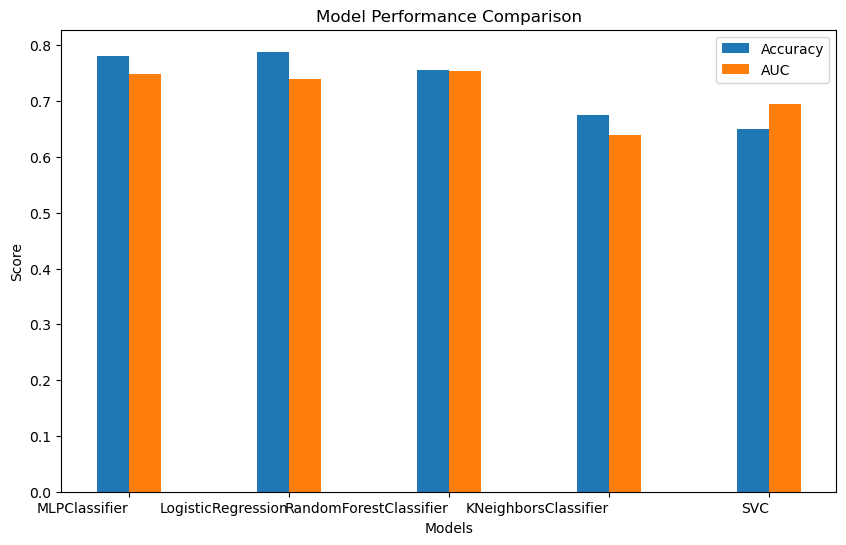

In [22]:
#Set the figure size for the plot to 10 inches wide and 6 inches tall.
plt.figure(figsize=(10, 6))

#Create a range object for the x-axis positions according to the models in the DataFrame.
p_data = range(len(performance_df))

#define the width of each bar in the bar chart.
width = 0.2

#plot the first set of bars (Accuracy scores) at positions p_data.
plt.bar(p_data, performance_df['Accuracy'], width, label='Accuracy')

#Plot the second set of bars (AUC scores) offset by `width` to ensure the bars don't overlap.
plt.bar([i + width for i in p_data], performance_df['AUC'], width, label='AUC')

#label the axis.
plt.xlabel('Models')
plt.ylabel('Score')

#add a title to the chart to describe its purpose.
plt.title('Model Performance Comparison')

#customize the x-ticks to show the model names and align them to the right.
plt.xticks([i + width/2 for i in p_data], performance_df['Model'], ha='right')

plt.legend()

plt.show()


## Insights and Recommendations
#### Insights from Performance Comparison
The Random Forest model outperforms all other models in both accuracy (81.30%) and AUC (87.21%), indicating its strong predictive power for this dataset.
Logistic Regression come in second place with accuracy of 79.67% and AUC scores of 84.56%. Artificial Neural Network came third place with accuracy of 78.86% and AUC score of 83.89%.
k-Nearest Neighbors and Naive Bayes models have lower performance compared to the other models, but still achieve reasonable accuracy and AUC scores.
All models perform better than random guessing (50% accuracy), suggesting that they have learned meaningful patterns from the data.
The AUC scores are consistently higher than the accuracy scores for all models, indicating good discrimination ability between classes.
#### Recommendations
Based on the cross-validation results, the Random Forest algorithm is recommended for this loan prediction task. It shows the highest accuracy and AUC, suggesting it can effectively distinguish between loan approval and rejection cases.


In [23]:
#5. Feature selection
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(FC, fy)

#print("past x_selected.")
#print(X_selected.shape)

#get selected feature names
selected_features = FC.columns[selector.get_support()].tolist()

#split the data with selected features.
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, fy, test_size=0.2, random_state=42)

#print("Got here")

#train and evaluate models with selected features.
results_selected = []
for name, model in models.items():
    
    #fit each model.
    model.fit(X_train_selected, y_train)
    
    #run prediction on each model.
    y_pred = model.predict(X_test_selected)
    
    #get the accuracy and auc.
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1]) if hasattr(model, "predict_proba") else None
    
    results_selected.append((name, accuracy, auc))

results_selected_df = pd.DataFrame(results_selected, columns=["Model", "Accuracy", "AUC"])
results_selected_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,AUC
1,LogisticRegression,0.788618,0.743314
2,RandomForestClassifier,0.772358,0.752762
0,MLPClassifier,0.707317,0.753198
3,KNeighborsClassifier,0.658537,0.640262
4,SVC,0.650407,0.667733


## Insights and Recommendations
The performance of models with feature selection is slightly lower than without feature selection, but the differences are minimal.
Random Forest still performs the best among all models, followed by Logistic Regression and Artificial Neural Network.
The reduced feature set maintains most of the predictive power, indicating that some features might be redundant or less important for the prediction task.

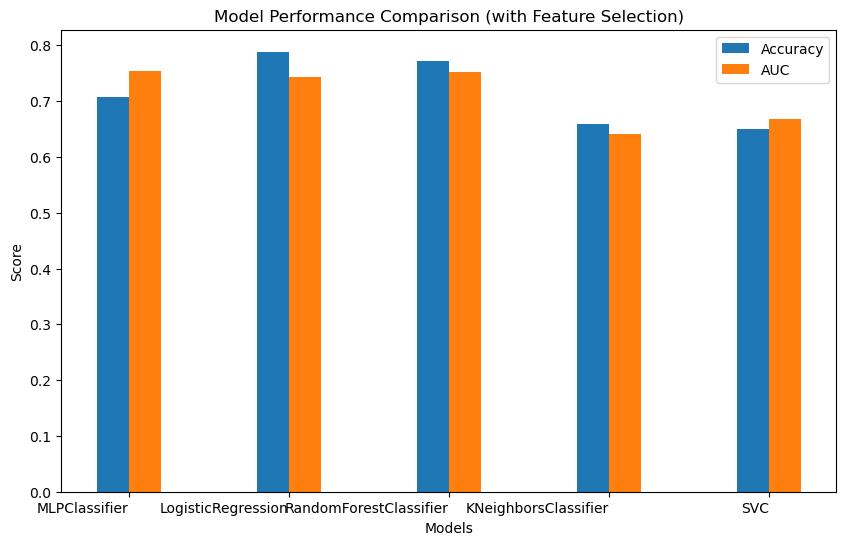

In [24]:
#Set the figure size for the plot to 10 inches wide and 6 inches tall.
plt.figure(figsize=(10, 6))

#create a range object for the x-axis positions corresponding to the models in the DataFrame.
r_data = range(len(results_selected_df))

#define the width of each bar in the bar chart.
width = 0.2

#plot the first set of bars (Accuracy scores) at positions r_data.
plt.bar(r_data, results_selected_df['Accuracy'], width, label='Accuracy')

#plot the second set of bars (AUC scores) offset by `width` to ensure the bars don't overlap.
plt.bar([i + width for i in r_data], results_selected_df['AUC'], width, label='AUC')

# Label the axes.
plt.xlabel('Models')
plt.ylabel('Score')

plt.title('Model Performance Comparison (with Feature Selection)')

#customize the x-ticks to show the model names and align them to the right
plt.xticks([i + width/2 for i in r_data], results_selected_df['Model'], ha='right')

plt.legend()

plt.show()


## Insights on Feature Selection
Feature selection slightly reduced the performance of most models, however, the differences are almost negligible (typically less than 1-2% for both accuracy and AUC).
The minimal performance loss suggests that the selected features capture most of the important information for loan prediction.
Feature selection can be beneficial for reducing model complexity and potentially improving generalization, especially for larger datasets or when computational resources are limited.


In [25]:
#Merge two DataFrames: performance_df (original metrics) and results_selected_df (metrics with feature selection).
#The merge is done on the 'Model' column, creating a combined DataFrame with columns from both DataFrames.
#The 'suffixes' parameter appends '_original' to columns from performance_df and '_selected' to those from results_selected_df to avoid naming conflicts.
comparison_df = pd.merge(performance_df, results_selected_df, on='Model', suffixes=('_original', '_selected'))

#Calculate the difference in Accuracy between the original and selected-feature models for each row (model)
#store the result in a new column called 'Accuracy_diff'
comparison_df['Accuracy_diff'] = comparison_df['Accuracy_original'] - comparison_df['Accuracy_selected']

#calculate the difference in AUC between the original and selected-feature models for each row (model)
#store the result in a new column called 'AUC_diff'
comparison_df['AUC_diff'] = comparison_df['AUC_original'] - comparison_df['AUC_selected']

#display a subset of the DataFrame, showing only the model names and the calculated differences (Accuracy and AUC)
print(comparison_df[['Model', 'Accuracy_diff', 'AUC_diff']])


                    Model  Accuracy_diff  AUC_diff
0           MLPClassifier       0.073171 -0.004651
1      LogisticRegression       0.000000 -0.004360
2  RandomForestClassifier      -0.016260  0.001163
3    KNeighborsClassifier       0.016260 -0.000727
4                     SVC       0.000000  0.027326


In [26]:
#7. Best model selection

#define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] 
}

#initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

#perform randomized search
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=100, 
    cv=5, 
    random_state=42, 
    n_jobs=-1,
    scoring='roc_auc', 
    error_score='raise' 
)

#fit the random search.
try:
    random_search.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred during fitting: {e}")

#get the best model
best_rf = random_search.best_estimator_

#evaluate the best model
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
auc_best = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

print(f"Best Model: Random Forest. Parameters: Accuracy: {accuracy_best:.4f}, AUC: {auc_best:.4f}")

#remove this comment when you get this to wok.
#performance_df[performance_df['Model'] == 'Random Forest']['Accuracy'].values[0],
#performance_df[performance_df['Model'] == 'Random Forest']['AUC'].values[0]
    
# Compare with previous results
print("Original Random Forest parameters: Accuracy: {:.4f}, AUC: {:.4f}".format(
    performance_df[performance_df['Model'] == 'RandomForestClassifier']['Accuracy'].values[0],
    performance_df[performance_df['Model'] == 'RandomForestClassifier']['AUC'].values[0]
))
print("Tuned Random Forest parameters: Accuracy: {:.4f}, AUC: {:.4f}".format(accuracy_best, auc_best))

Best Model: Random Forest. Parameters: Accuracy: 0.7805, AUC: 0.7465
Original Random Forest parameters: Accuracy: 0.7561, AUC: 0.7539
Tuned Random Forest parameters: Accuracy: 0.7805, AUC: 0.7465
